In [52]:
import warnings
warnings.filterwarnings("ignore") # Shhhh
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS as stopwords
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from nltk.stem import PorterStemmer
import nltk
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
df_train = pd.read_csv('./data/large_train_sample.csv')
df_val = pd.read_csv('./data/test_data.csv')

In [3]:
df_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K


In [4]:
df_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
wage              0
dtype: int64

In [5]:
df_train.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
wage              32561 non-null object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [7]:
df_train['wage'].value_counts(normalize = True)

 <=50K    0.75919
 >50K     0.24081
Name: wage, dtype: float64

In [8]:
df_train['wage'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [9]:
#wage ordinals
df_train['wage']= df_train['wage'].replace({' >50K': 1,' <=50K': 0})


In [10]:
df_train['wage'].unique()

array([0, 1], dtype=int64)

In [11]:
df_train['wage'].value_counts(normalize = True)

0    0.75919
1    0.24081
Name: wage, dtype: float64

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
wage              32561 non-null int64
dtypes: int64(7), object(7)
memory usage: 3.5+ MB


In [13]:
df_train.education.value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [14]:
df_train['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [15]:
education_rank = {' Preschool':1,
                  ' 1st-4th': 2,
                  ' 5th-6th':3,
                  ' 7th-8th':4,
                  ' 9th':5,
                  ' 10th':6,
                  ' 11th':7,
                  ' 12th':8,
                  ' HS-grad':9,
                  ' Some-college':10,
                  ' Assoc-acdm':11,
                  ' Assoc-voc':11,
                  ' Bachelors':12,
                  ' Prof-school':13,
                  ' Masters':14,
                  ' Doctorate':15}

df_train['ed_rank'] = df_train['education'].replace(education_rank)
df_val['ed_rank'] = df_val['education'].replace(education_rank)

In [16]:
df_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage,ed_rank
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,0,12
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,0,12
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,0,9
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,0,7
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,0,12


In [17]:
df_val.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,ed_rank
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Male,0,0,40,United-States,7
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,Male,0,0,50,United-States,9
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,Male,0,0,40,United-States,11
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Male,7688,0,40,United-States,10
4,18,?,103497,Some-college,10,Never-married,?,Own-child,Female,0,0,30,United-States,10


In [18]:
df_train.loc[df_train['occupation']==' ?']

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage,ed_rank
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Male,0,0,60,South,1,10
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,Male,0,0,40,?,0,4
69,25,?,200681,Some-college,10,Never-married,?,Own-child,Male,0,0,40,United-States,0,10
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,Male,0,0,2,United-States,0,6
106,17,?,304873,10th,6,Never-married,?,Own-child,Female,34095,0,32,United-States,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,Female,0,0,55,United-States,1,12
32531,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Female,0,0,99,United-States,0,12
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,Male,0,0,10,United-States,1,15
32541,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Female,0,0,32,United-States,0,9


In [19]:
df_train['native-country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [20]:
#Income Feature
df_train['income']= df_train['fnlwgt']+df_train['capital-gain']-df_train['capital-loss']
df_val['income']= df_val['fnlwgt']+df_val['capital-gain']-df_val['capital-loss']


In [21]:
df_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage,ed_rank,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,0,12,79690
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,0,12,83311
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,0,9,215646
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,0,7,234721
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,0,12,338409


In [22]:
#Working class ordinal rank
workclass={' Private':8, 
           ' Self-emp-not-inc':7,
           ' Self-emp-inc':6, 
           ' Federal-gov':5, 
           ' Local-gov':4,
           ' State-gov':3,
           ' Without-pay':2,
           ' Never-worked':1,
           ' ?':0}
df_train['workclassrank'] = df_train['workclass'].replace(workclass)
df_val['workclassrank'] = df_val['workclass'].replace(workclass)

In [23]:
#marital-status
# df_train["marital-status"] = df_train["marital-status"].replace([' Never-married',' Divorced',' Separated',' Widowed'], ' Single')
# df_train["marital-status"] = df_train["marital-status"].replace([' Married-civ-spouse',' Married-spouse-absent',' Married-AF-spouse'], ' Married')
# df_val["marital-status"] = df_val["marital-status"].replace([' Never-married',' Divorced',' Separated',' Widowed'], ' Single')
# df_val["marital-status"] = df_val["marital-status"].replace([' Married-civ-spouse',' Married-spouse-absent',' Married-AF-spouse'], ' Married')

# df_train['marital-status'] = df_train['marital-status'].map({" Married" : 1, " Single" : 0})
# df_val['marital-status'] = df_val['marital-status'].map({" Married" : 1, " Single" : 0})

In [24]:
df_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage,ed_rank,income,workclassrank
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,0,12,79690,3
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,0,12,83311,7
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,0,9,215646,8
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,0,7,234721,8
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,0,12,338409,8


In [25]:
occupation=   {
       ' Adm-clerical':2,
       ' Exec-managerial':3,
       ' Prof-specialty' :3,
       ' Handlers-cleaners':1,
       ' Other-service':1,
       ' Sales':2,
       ' Craft-repair':2,
       ' Transport-moving':2,
       ' Farming-fishing':2,
       ' Machine-op-inspct':2,
       ' Tech-support':3,
       ' Protective-serv':3,
       ' Armed-Forces':2,
       ' Priv-house-serv':1,
        ' ?': 2}
df_train['occupation_rank'] = df_train['occupation'].replace(occupation)
df_val['occupation_rank'] = df_val['occupation'].replace(occupation)

In [26]:
nominal_cols = ['relationship','native-country','occupation','workclass', 'marital-status']

In [27]:
df_train = pd.get_dummies(df_train, columns = nominal_cols, drop_first = True)

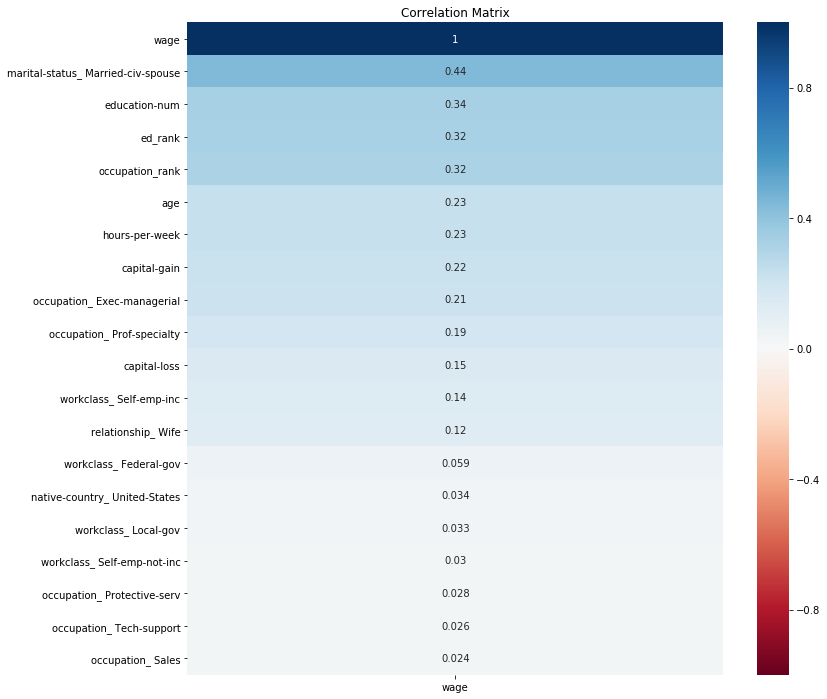

In [28]:
plt.figure(figsize = (12,12))
plt.title("Correlation Matrix")
sns.heatmap(df_train.corr()[['wage']].sort_values('wage', ascending = False).head(20),
           annot = True, cmap = 'RdBu', vmax = 1, vmin = -1)

In [29]:
df_train['capital_change'] = df_train['capital-gain']+df_train['capital-loss']
df_val['capital_change'] = df_val['capital-gain']+df_val['capital-loss']

In [30]:
df_train.columns 

Index(['age', 'fnlwgt', 'education', 'education-num', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'wage', 'ed_rank', 'income',
       'workclassrank', 'occupation_rank', 'relationship_ Not-in-family',
       'relationship_ Other-relative', 'relationship_ Own-child',
       'relationship_ Unmarried', 'relationship_ Wife',
       'native-country_ Cambodia', 'native-country_ Canada',
       'native-country_ China', 'native-country_ Columbia',
       'native-country_ Cuba', 'native-country_ Dominican-Republic',
       'native-country_ Ecuador', 'native-country_ El-Salvador',
       'native-country_ England', 'native-country_ France',
       'native-country_ Germany', 'native-country_ Greece',
       'native-country_ Guatemala', 'native-country_ Haiti',
       'native-country_ Holand-Netherlands', 'native-country_ Honduras',
       'native-country_ Hong', 'native-country_ Hungary',
       'native-country_ India', 'native-country_ Iran',
       'native-country_ Ireland', 

In [42]:
df_train['sex'] = df_train['sex'].replace({' Male': 1, ' Female': 0})

In [43]:
df_train['sex'].value_counts()

1    21790
0    10771
Name: sex, dtype: int64

In [44]:
features = ['age','income','workclassrank','marital-status', 'education-num','occupation_rank','hours-per-week']
X = df_train[['marital-status_ Married-civ-spouse', 'education-num', 'age', 'hours-per-week', 'capital_change',
             'sex','occupation_ Exec-managerial' , 'occupation_ Prof-specialty',
            'workclass_ Self-emp-inc', 'relationship_ Wife', 'workclass_ Federal-gov', "native-country_ United-States" ,
              'workclass_ Local-gov', 'workclass_ Self-emp-not-inc', 'occupation_ Protective-serv', 'occupation_ Sales' , 
              'native-country_ India', 'native-country_ Iran', 'native-country_ Japan', 'workclass_ State-gov' ]]
y = df_train['wage']
logreg = LogisticRegression(penalty = 'l1', solver = 'liblinear')
X_train,X_test,y_train,y_test = train_test_split(X,y, stratify = y, random_state = 42)

In [45]:
logreg.fit(X_train,y_train)
logreg.score(X_train,y_train)

0.8472563472563472

In [46]:
logreg.score(X_test,y_test)

0.8496499201572288

In [51]:
logreg.coef_

array([[ 2.04692890e+00,  2.84701565e-01,  2.81872905e-02,
         2.97060671e-02,  3.30533814e-04,  7.48687400e-01,
         9.90978080e-01,  7.58669784e-01,  2.24073673e-01,
         1.20700591e+00,  6.13741149e-01,  2.31700968e-01,
        -1.80508754e-01, -4.78514986e-01,  7.36103257e-01,
         4.24464142e-01, -6.91763782e-02,  4.83499529e-02,
         9.57062655e-02, -2.88890272e-01]])

In [ ]:
svc = SVC(probability=True)
pgrid = {'C':np.logspace(-2,2,100),
        'kernel':['linear','rbf']}
gcv = GridSearchCV(svc, pgrid, cv = 5, n_jobs = 2)
gcv.fit(X_train,y_train)
test_score = gcv.score(X_test,y_test)
train_score = gcv.score(X_train,y_train)
print(f'test_score: {test_score},train_score{train_score}')